# Week 4 assignment

In [1]:
%pylab inline

from sympy import *
init_printing(use_unicode = True, fontsize = 16)
pi2 = pi*2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.tools.dsp import *

Dirac Delta function is : $$\delta(x) = \lim_{a\to 0} \frac{1}{|a|\sqrt{\pi}}e^{-(\frac{x}{a})^2}$$ 

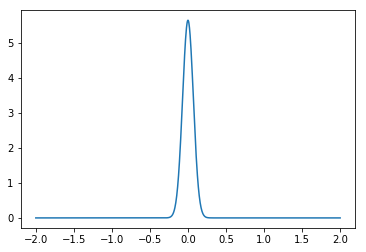

In [3]:
x = np.linspace(-2, 2, 1001)
y = fourier.dirac_delta_function(x, a = 1e-1)
plt.plot(x, y);

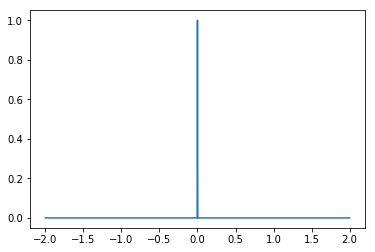

In [4]:
x = np.linspace(-2, 2, 1001)
y = dsp.delta(x)
plt.plot(x, y);

In [5]:
def cycle(n, N):
    return n % N

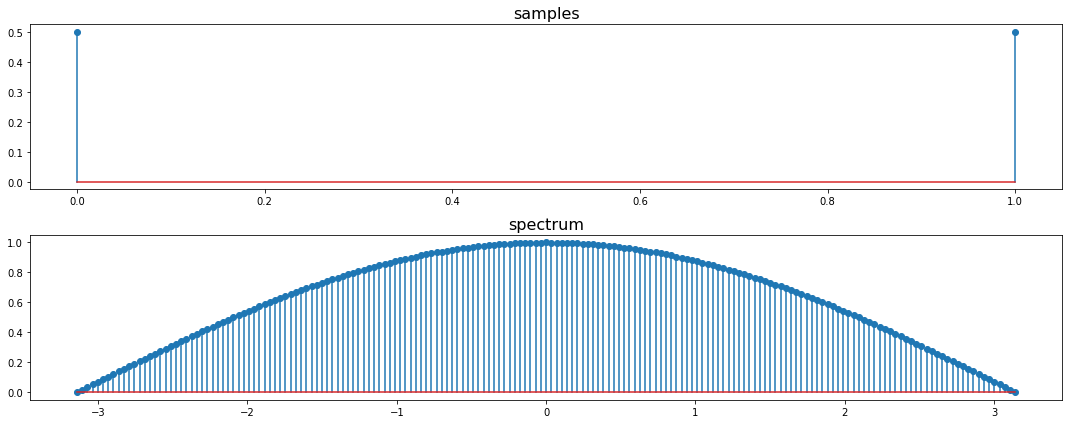

In [6]:
X = fourier.dtft(samples=[1/2,1/2])

C:\Softwares\Python\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


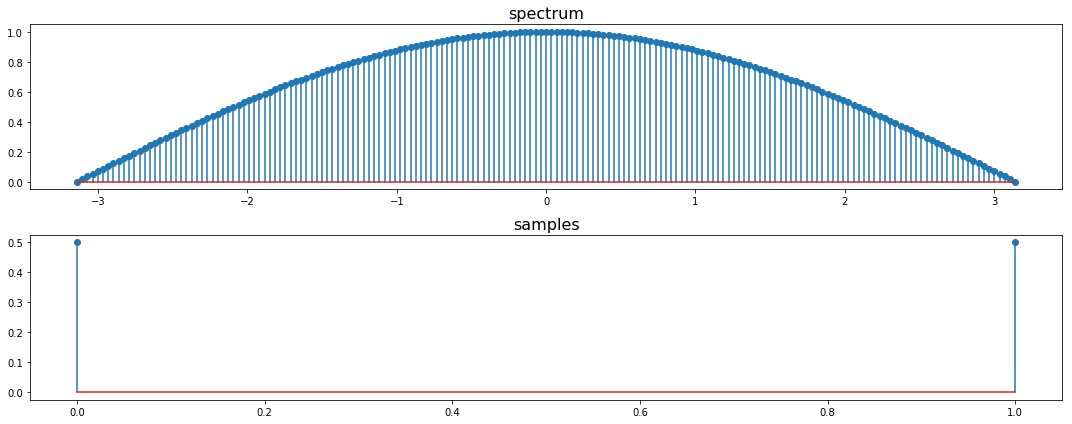

In [7]:
x = fourier.idtft(X, n_samples = 2)

In [8]:
# X = dtft([1,0] , 100)

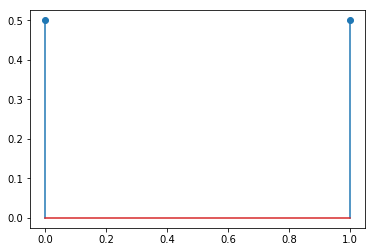

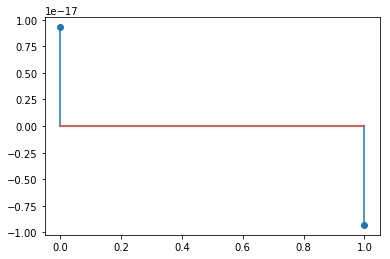

In [9]:
plt.stem(x.real)
plt.show()
plt.stem(x.imag);

# 1. 

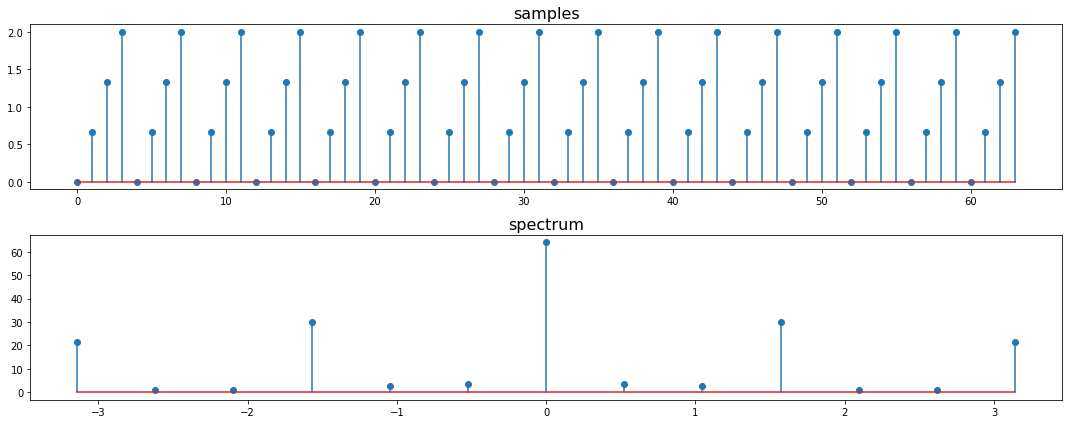

In [10]:
x = fourier.ks(period_length = 4, periods = 16, base = 1, alpha = 1)
X = fourier.dtft(x, freq_bins = 12)

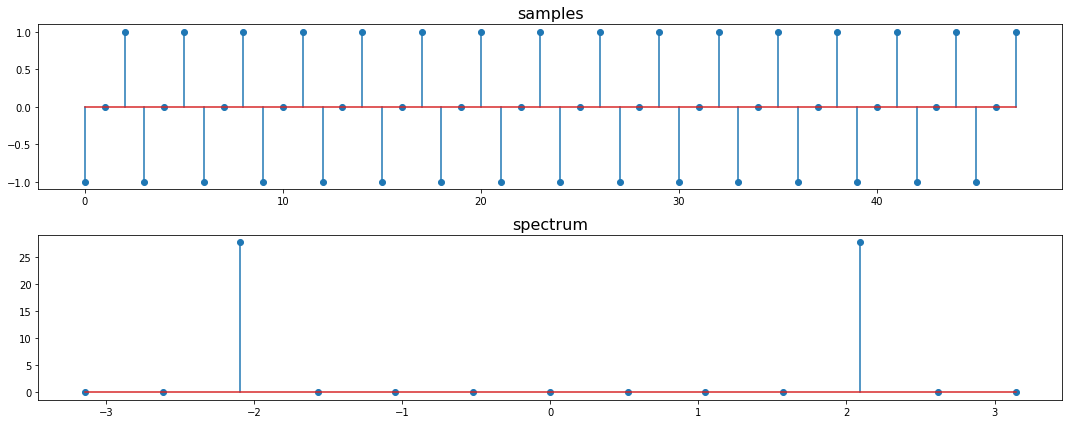

In [11]:
x = fourier.ks(period_length = 3, periods = 16, alpha = 1)
X = fourier.dtft(x, freq_bins = 12)

# 2. 
3 4 

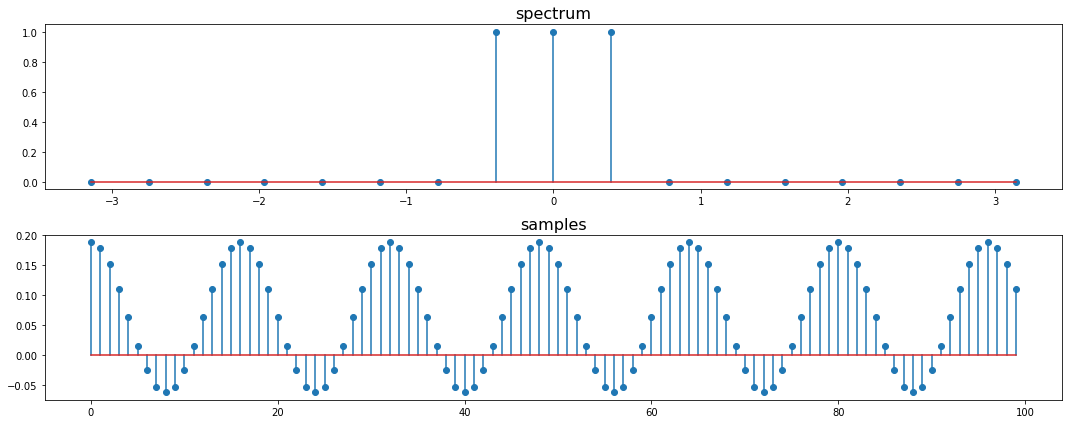

In [12]:
w = np.linspace(-np.pi/8, np.pi/8, 100)
X = np.zeros(17)
X[7:10] = 1
x = fourier.idtft(X, n_samples=100)
# x = abs(x)
x = x.real
n = np.arange(len(x))

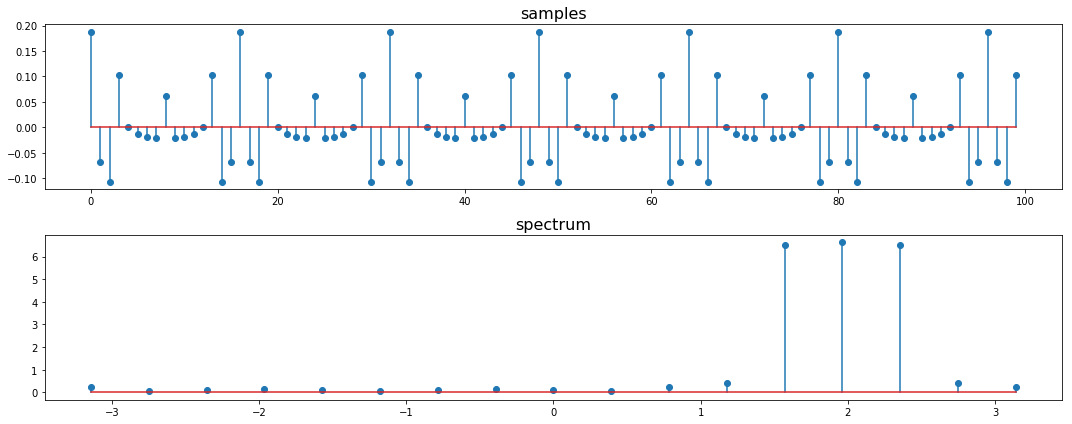

In [13]:
s1 = np.exp(1j*5*np.pi/8*n) * x
X1 = fourier.dtft(s1, freq_bins=16, plt_abs=True)

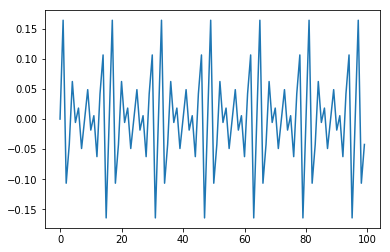

In [14]:
plt.plot(s1.imag);

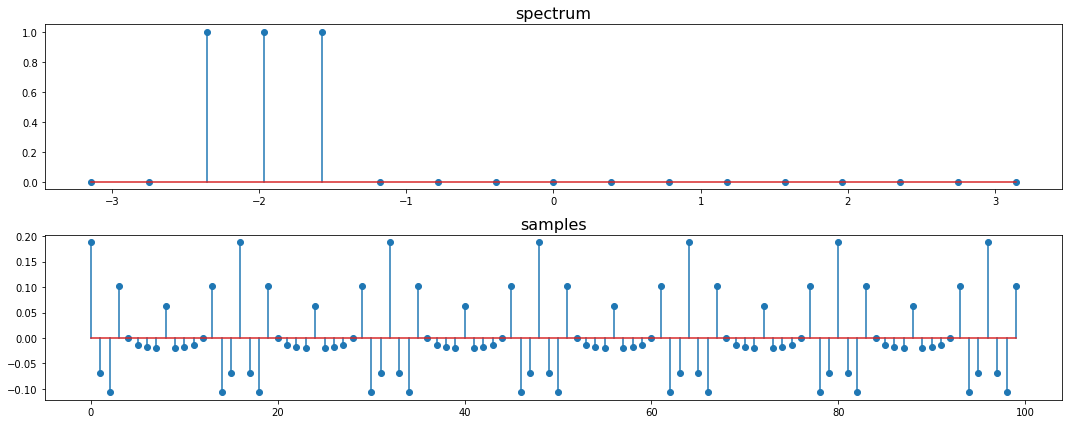

In [15]:
s2 = fourier.idtft(np.roll(X, -5), n_samples=100)

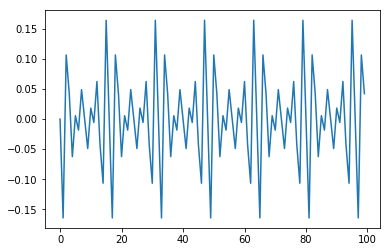

In [16]:
plt.plot(s2.imag);

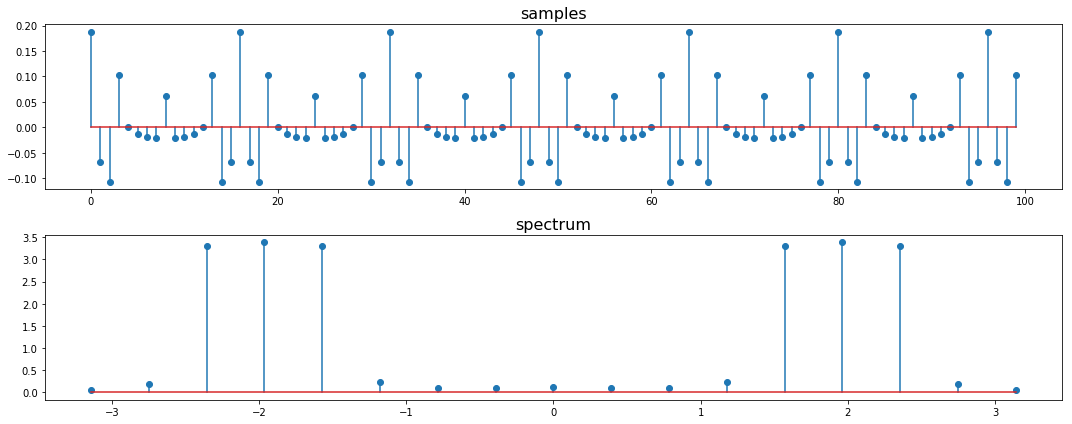

In [17]:
s3 = np.cos(5*np.pi/8*n) * x
X3 = fourier.dtft(s3, freq_bins=16)

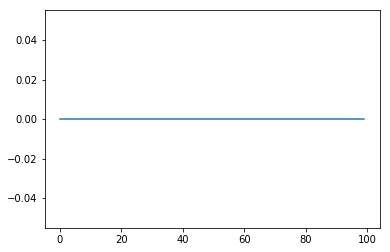

In [18]:
plt.plot(s3.imag);

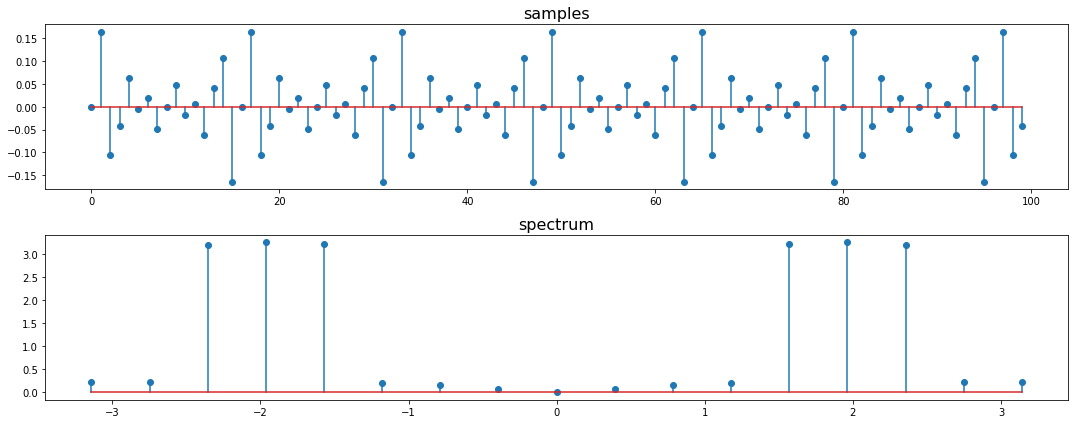

In [19]:
s4 = np.sin(21*np.pi/8*n) * x
X4 = fourier.dtft(s4, freq_bins=16)

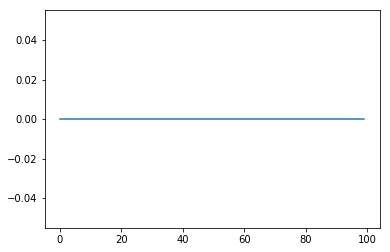

In [20]:
plt.plot(s4.imag);

# 3. 
(1 - exp(-2*I*pi*M*k/L))/(1 - exp(-2*I*pi*k/L))  

$$x[n] = \begin{cases}
  1
  & 0<= n<= M-1 \\
  0
  & M<=n<=L-1\\ 
\end{cases} $$ 

$$ 
\begin{align}
X[k] &= \sum_{n=0}^{L-1} x[n]e^{-j\frac{2\pi}{L}kn} \\
&= \sum_{n=0}^{M-1} e^{-j\frac{2\pi}{L}kn} \\
&= \frac{1-e^-j\frac{2\pi}{L}kM}{1-e^-j\frac{2\pi}{L}k}
\end{align} 
$$  



In [21]:
Xk, n, L, M, x, k, w= symbols('Xk n L M x k w')

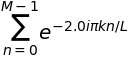

In [22]:
Xk = Sum(Pow(E, -1j*2*pi/L*k*n), (n, 0, M-1))
Xk.simplify()

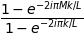

In [23]:
w = 2*pi/L*k
Xk = (1-E**(-I*w*M))/  (1-E**(-I*w))
Xk = Xk#.simplify()#.cancel()#.rewrite(sin)#.simplify().rewrite(sin)
Xk

In [24]:
print(Xk)

(1 - exp(-2*I*pi*M*k/L))/(1 - exp(-2*I*pi*k/L))


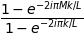

In [25]:
Xk.rewrite(sin).simplify()

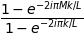

In [26]:
collect(Xk, E)

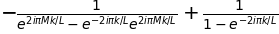

In [27]:
expand(Xk)

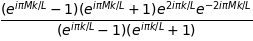

In [28]:
factor(Xk)

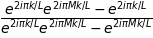

In [29]:
cancel(Xk)

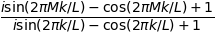

In [30]:
Xk.rewrite(sin)

# 4. 
2 3 

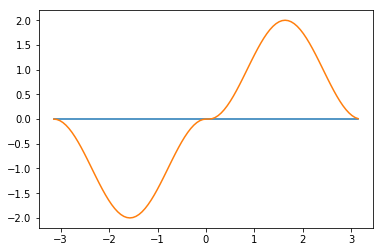

In [31]:
w = np.linspace(-np.pi, np.pi, 101)
X = np.hstack((np.cos(w[:50]*2) - 1, [0], -np.cos(w[:50]*2)+1))
X = 1j * X
plt.plot(w, X);
plt.plot(w, X.imag);

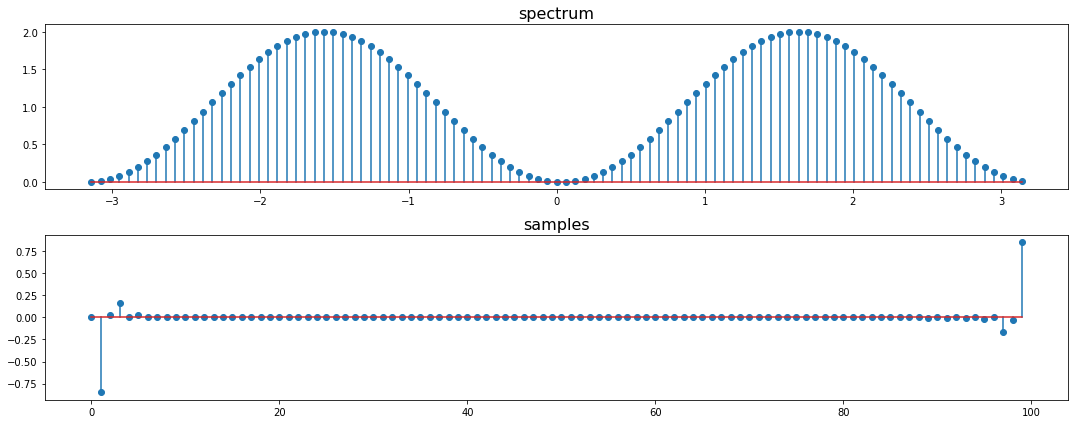

In [32]:
x = fourier.idtft(X, n_samples=100)

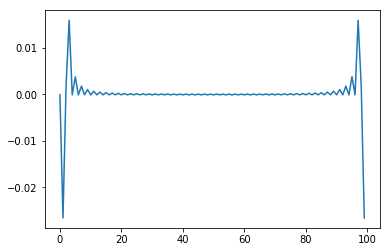

In [33]:
plt.plot(x.imag);

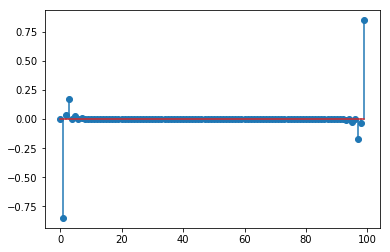

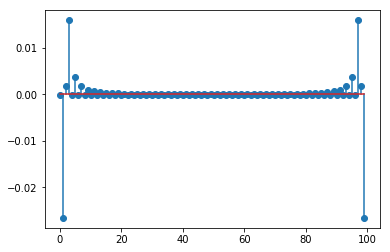

In [34]:
plt.stem(x.real)
plt.show()
plt.stem(x.imag);

# 5. 
$$
\begin{align}
\omega &= \frac{2\pi}{N}k \\
X[\omega] &= \sum_{n=-\infty}^{\infty} x[n]e^{-j\omega n} \\
\\
x[n] &= \frac{1}{2\pi} \int_{-\pi}^{\pi} X(\omega)e^{j\omega n} d\omega \\
\\
j\frac{d}{d\omega} X[\omega] & = j\frac{d}{d\omega}  \sum_{n=-\infty}^{\infty} x[n]e^{-j\omega n} \\
& = j  \sum_{n=-\infty}^{\infty}  x[n] \frac{d}{d\omega}e^{-j\omega n} \\
& = j  \sum_{n=-\infty}^{\infty}  x[n]  (-jn e^{-j\omega n}) \\
& = j(-j) \sum_{n=-\infty}^{\infty} n \space x[n]   e^{-j\omega n} \\
& = \sum_{n=-\infty}^{\infty} n \space x[n]   e^{-j\omega n} \\
\\
\hat{x}[k] = \frac{1}{2\pi} \int_{-\pi}^{\pi} j\frac{d}{d\omega} X(\omega)e^{j\omega k} d\omega & = \frac{1}{2\pi} \int_{-\pi}^{\pi} \sum_{n=-\infty}^{\infty} n \space x[n]   e^{-j\omega n} \space e^{j\omega k} d\omega \\
& = \sum_{n=-\infty}^{\infty}  n \space x[n]  \int_{-\pi}^{\pi}   \frac{ e^{-j\omega n}}{2\pi} \space e^{j\omega k} d\omega \\
& = \sum_{n=-\infty}^{\infty}  n \space x[n]  \int_{-\pi}^{\pi}   \frac{e^{j\omega (k-n)}}{2\pi} \space  d\omega \\
& = \sum_{n=k}^{k}  n \space x[n] \\
& = k \space x[k]
\end{align}
$$   

In [35]:
f, X, x, w, n, N, k = symbols('f X x w n N k')

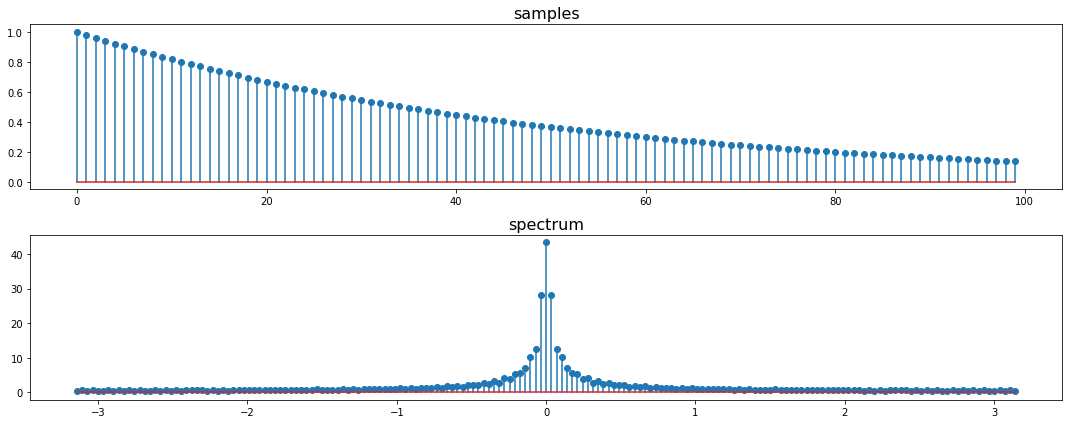

In [36]:
M = 20
seed = np.linspace(-1, 1, M)

L = 5

alpha = 0.98
n = np.arange(M*L)
x = 1 * alpha ** n

X = fourier.dtft(x, freq_bins = 180, plt_abs = True)

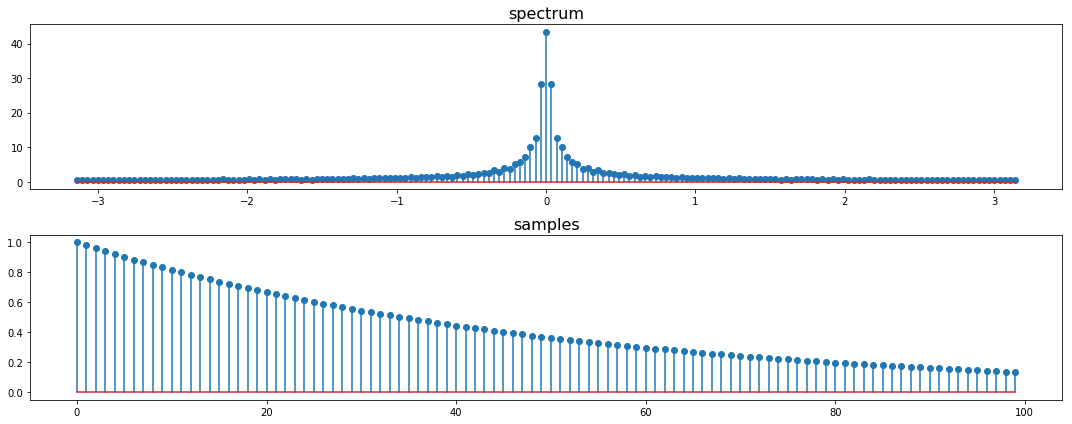

In [37]:
x = fourier.idtft((X), n_samples=len(x), plt_abs= True)

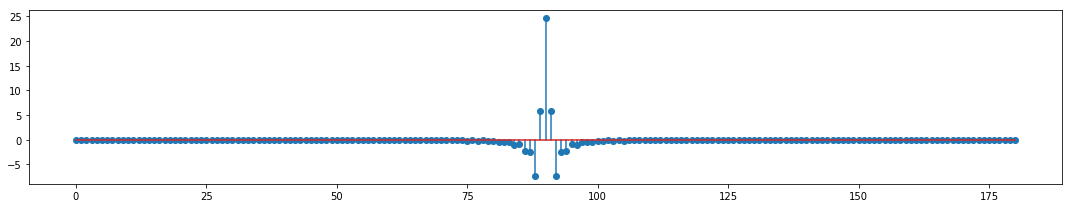

In [38]:
X_hat =  1j * np.gradient(X.ravel())

plt.figure(figsize = (15, 3))
plt.stem(X_hat)
plt.tight_layout();

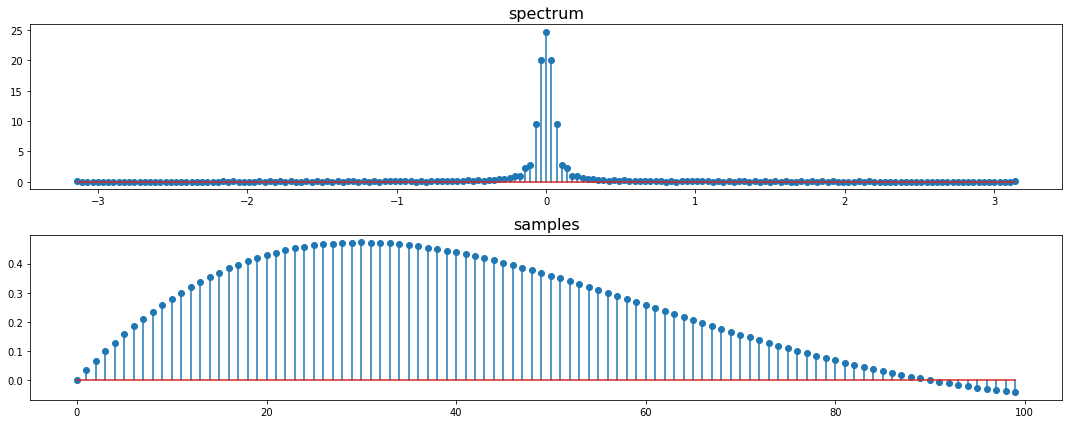

In [39]:
x_hat = fourier.idtft(X_hat, n_samples=len(x))

# 6. 
linearity

# 7. 

In [40]:
M = 20
x = np.linspace(-1, 1, M)

In [41]:
n = np.arange(100)
w1 = np.exp(-1j*PI2/M*2*n)
w2 = np.exp(-1j*PI2/M*-2*n)
np.all(abs(w1) == abs(w2)) 

True

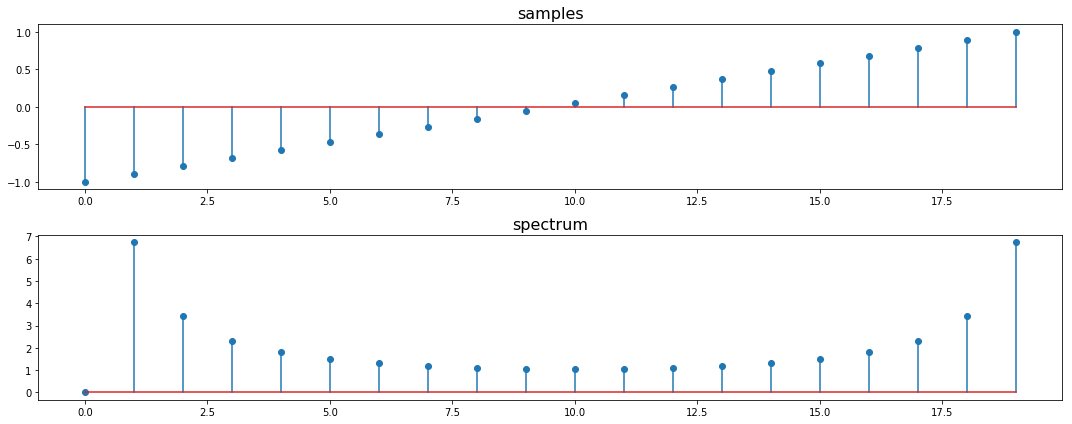

In [42]:
X = fourier.dft(x, plt_abs = True)

In [43]:
L = 5
n = np.arange(L * M)
x_hat = x[cycle(n, M)]

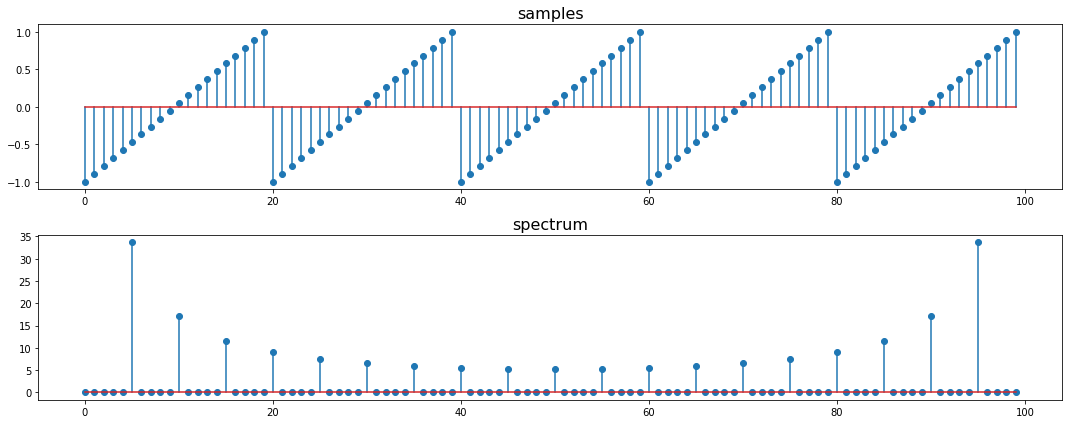

In [44]:
X_hat = fourier.dft(x_hat, plt_abs = True)

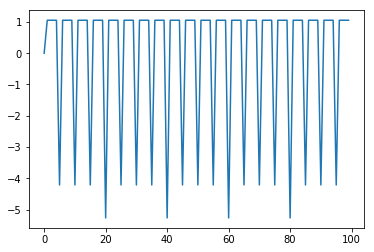

In [45]:
plt.plot(X_hat - X[cycle(n, M)]);

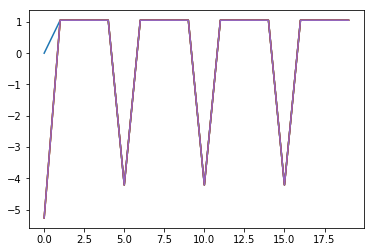

In [46]:
for l in range(L): 
    diff = [X_hat[k + l*M] - X[k] for k in range(M)]
    plt.plot(diff);

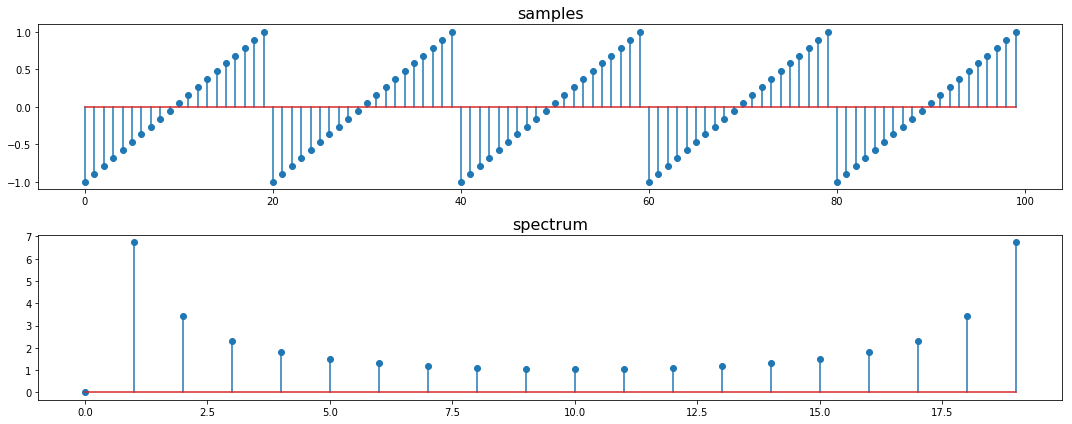

In [47]:
X_hat = fourier.dfs(x_hat, period_length = M, plt_abs = True)

# 8.
1

In [48]:
import os
import sys 

path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
sys.path.append(path)

from waves.sound import *

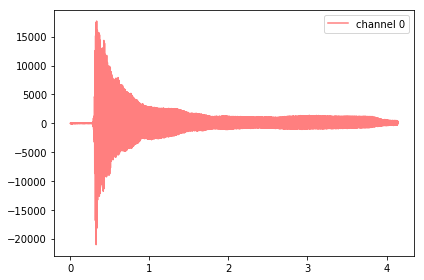

In [49]:
fn1 = 'Sound_8_1.wav'
WaveFile(fn1).show(0)

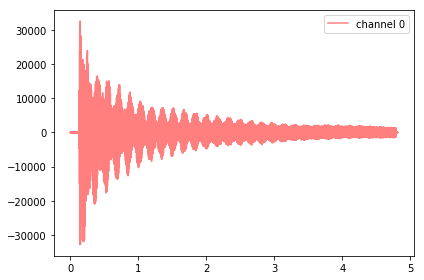

In [50]:
fn1 = 'Sound_8_2.wav'
WaveFile(fn1).show(0)

# 9.
The two frequencies are 440Hz and 480Hz, hence you can hear beats of 40Hz.

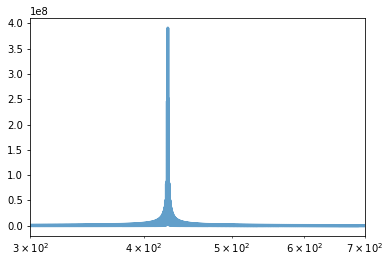

In [51]:
fn1 = 'ringbackA.wav'
wfa = WaveFile(fn1)
timbers = wfa.make_spectrums()
timbers.plot()
plt.xlim((300, 700));

In [52]:
timber = timbers.timbers[0]
timber.rank_by_amps()

(array([ 424.99468757,  425.49468132,  424.49469382, ..., 2667.16666042,
        1333.08333646, 2666.66666667]),
 array([3.90867512e+08, 2.51340119e+08, 2.46341153e+08, ...,
        1.00824589e+00, 8.49937129e-01, 1.80725714e-09]))

In [53]:
wfa.framerate

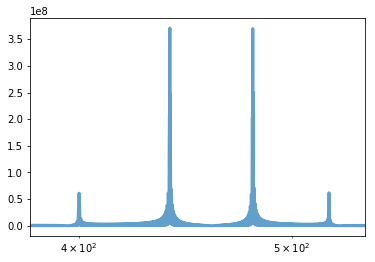

In [54]:
fn1 = 'ringbackB.wav'
wfb = WaveFile(fn1)
timbers = wfb.make_spectrums()
timbers.plot()
plt.xlim((380, 540));

In [55]:
timber = timbers.timbers[0]
timber.rank_by_amps()

(array([ 439.99450007,  479.99400007,  480.19399758, ..., 1237.08453644,
        1003.98745016, 1149.58563018]),
 array([3.71175547e+08, 3.69991445e+08, 2.50840703e+08, ...,
        2.88533809e+00, 1.66028806e+00, 3.63700223e-01]))

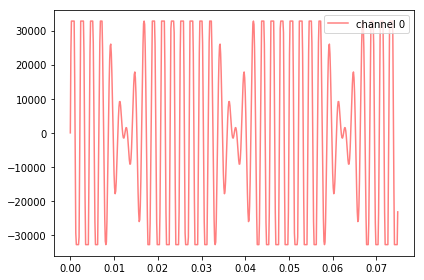

In [56]:
wfb.show(slice(0, 600))

In [57]:
wfb.play()

# 10.
Spectrum (a) corresponds to the European ringback tone.

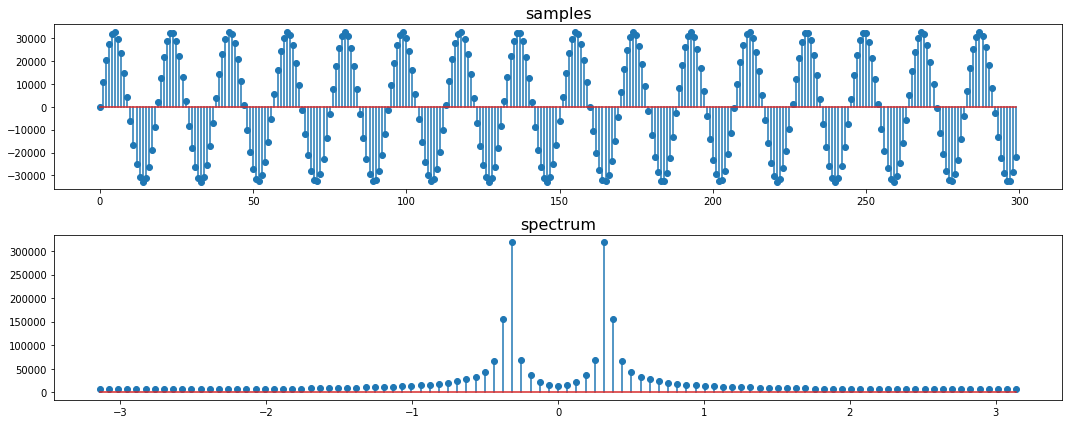

In [58]:
ys_europe = wfa.channels[0].ys[:300]
X_eu      = fourier.dtft(ys_europe, freq_bins = 100, plt_abs = True)

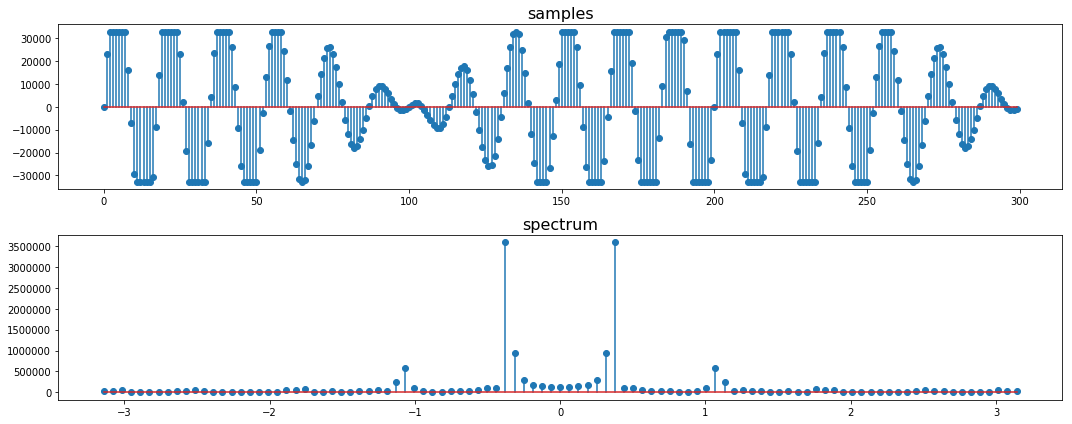

In [59]:
ys_usa = wfb.channels[0].ys[:300]
X_us   = fourier.dtft(ys_usa, freq_bins = 100, plt_abs = True)

# 11. 
2
There exists N\in\mathbb NN∈N for which x_2[n]x 
2
​	 [n] has a DFS of size NN

# 12. < 0.5 / 1
1/3 9/10

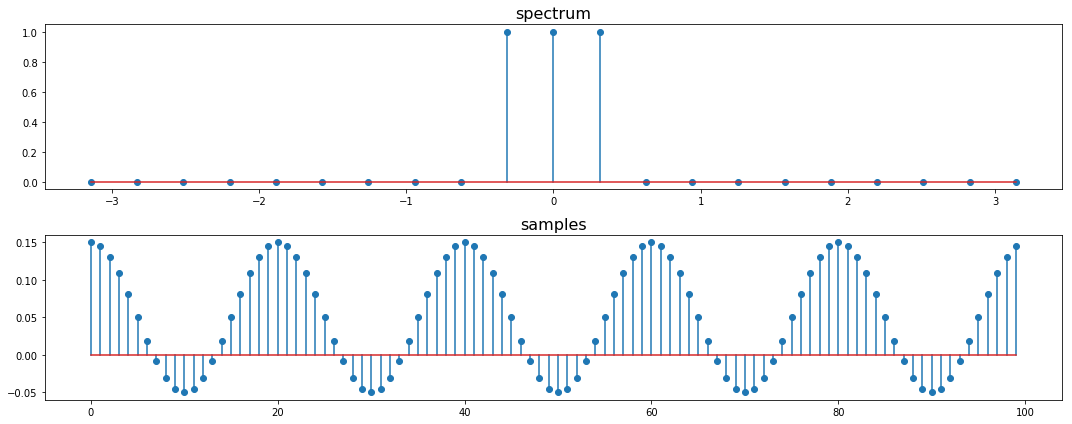

In [60]:
X = np.zeros(21)
X[9:12] = 1
x = fourier.idtft(X, n_samples = 100)
# x = abs(x)
x = x.real
n = np.arange(len(x))

In [61]:
def mod_demod(x, w, freq_bins = 20):    
    n = np.arange(len(x))
    modulator = np.cos(w * np.pi * n)
    
    y = x * modulator
    y_demodulated = y * modulator
    
    X_restored = fourier.dtft(y_demodulated,freq_bins= freq_bins)

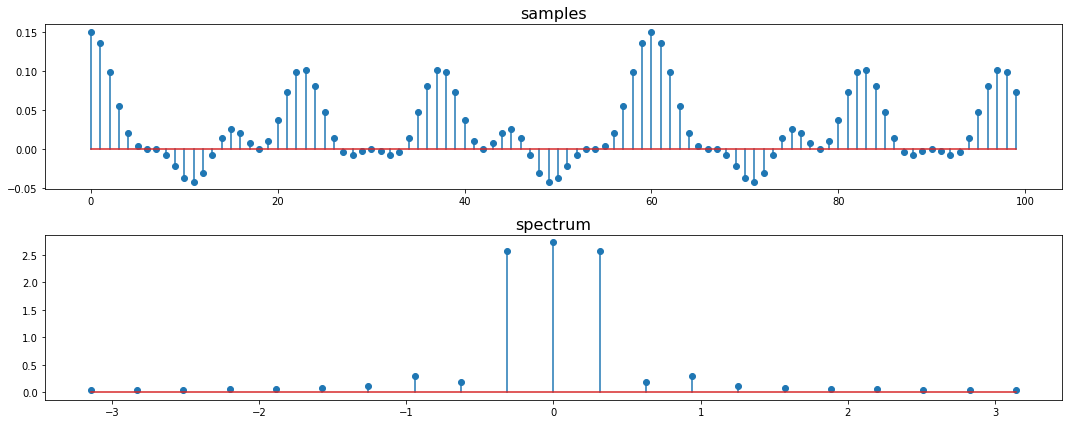

In [62]:
mod_demod(x, 11/12)

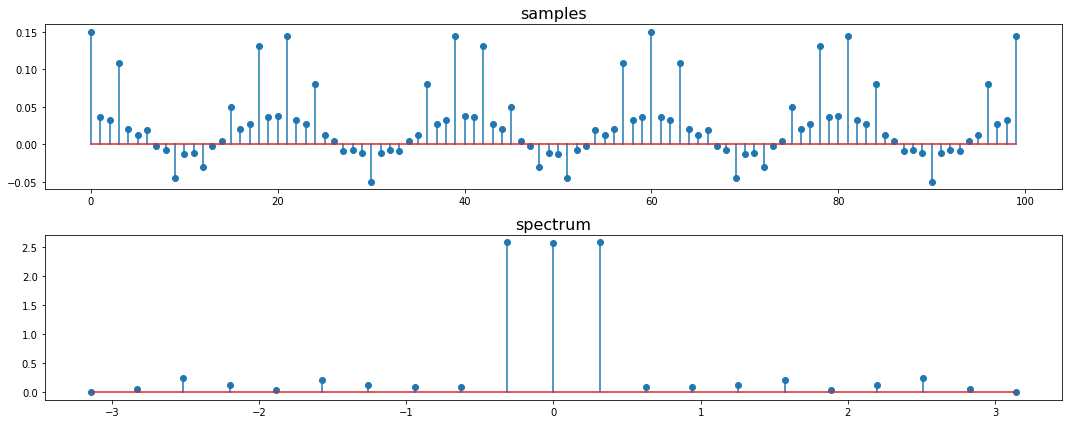

In [63]:
mod_demod(x, 1/3)

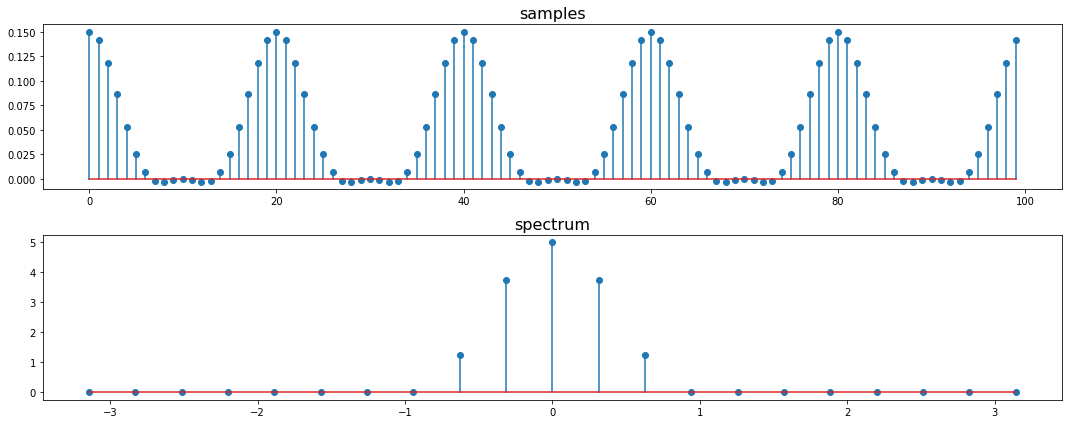

In [64]:
mod_demod(x, 1/20)

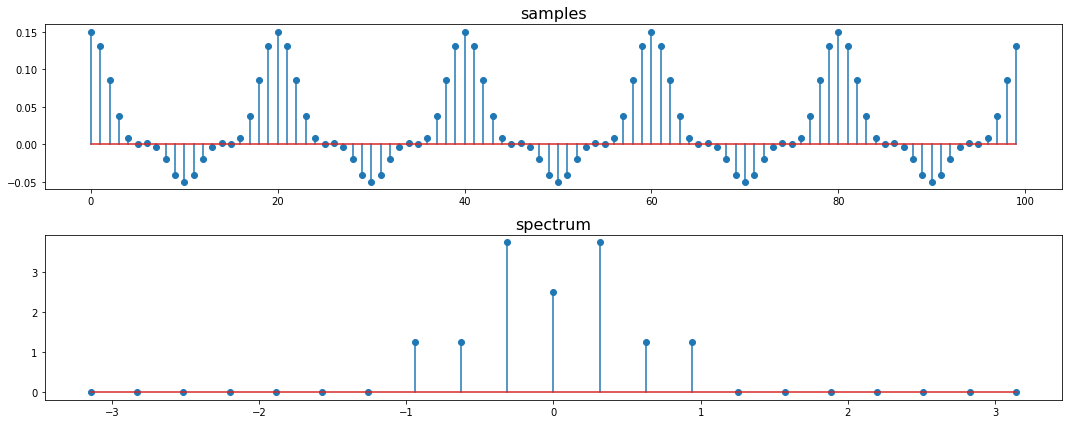

In [65]:
mod_demod(x, 9/10)